# 11. Data exploration - model (numeric)

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
options(repr.plot.width=4, repr.plot.height=3)

In [3]:
sample_file <- "../preprocessed_data/sample_features_2019-09-05.feather"
sample_crude_file <- "../preprocessed_data/sample_features_crude_2019-09-02.feather"

In [4]:
today <- Sys.Date()

## Read data

In [5]:
sample <- feather::read_feather(sample_file)
sample_crude <- feather::read_feather(sample_crude_file)
glimpse(sample)

Observations: 1,357
Variables: 61
$ YEAR                  <dbl> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,…
$ COMMODITY             <fct> crude, hvl, non-hvl, crude, hvl, non-hvl, crude…
$ OPERATOR_ID           <fct> Sunoco (Group), Sunoco (Group), Sunoco (Group),…
$ NAME                  <chr> "Sunoco (Group)", "Sunoco (Group)", "Sunoco (Gr…
$ MILES                 <dbl> 4008.780, 1852.530, 1506.550, 92.377, 24.609, 1…
$ AGE_UNKNOWN_MILES     <dbl> 429.690, 185.430, 148.890, 0.000, 0.000, 0.000,…
$ MILES_PRE_1940        <dbl> 269.07, 4.73, 40.90, 0.00, 0.00, 0.00, 1.70, 0.…
$ MILES_1940            <dbl> 500.350, 174.050, 130.370, 0.000, 0.000, 0.000,…
$ MILES_1950            <dbl> 519.030, 134.220, 147.840, 84.333, 0.000, 11.23…
$ MILES_1960            <dbl> 190.830, 98.080, 114.860, 40.250, 52.120, 2.848…
$ MILES_1970            <dbl> 99.300, 126.410, 271.510, 0.000, 0.000, 25.322,…
$ MILES_1980            <dbl> 67.050, 14.970, 64.900, 18.896, 4.482, 10.925, …
$ MILES_1990      

## 11.1 Correlation matrix

In [6]:
sample %>%
    select(MILES, INCIDENTS, SIGNIFICANT_INCIDENTS, MILES, miles_avg_3, sd_change_3, sd_change_sq, sd_change_pw_3, AVG_AGE, M_A, M_A_3) %>%
    as.matrix %>%
    cor(use="pairwise.complete.obs")

,MILES,INCIDENTS,SIGNIFICANT_INCIDENTS,miles_avg_3,sd_change_3,sd_change_sq,sd_change_pw_3,AVG_AGE,M_A,M_A_3
MILES,1.00000000,0.59751723,0.6549135,0.99530573,0.52615567,0.41630891,0.33857743,0.1404672658,0.0505118322,0.03206183
INCIDENTS,0.59751723,1.00000000,0.8620974,0.63370658,0.37746301,0.27955117,0.22193220,0.0465840199,0.1302074998,0.10658653
SIGNIFICANT_INCIDENTS,0.65491354,0.86209736,1.0000000,0.69440961,0.43078395,0.32947279,0.26176426,0.0384937020,0.1013630921,0.06625230
miles_avg_3,0.99530573,0.63370658,0.6944096,1.00000000,0.51444604,0.39079519,0.30801882,0.1305993581,0.0575983133,0.02378621
sd_change_3,0.52615567,0.37746301,0.4307839,0.51444604,1.00000000,0.87860856,0.74050312,0.0144206087,0.1544058629,0.13673925
sd_change_sq,0.41630891,0.27955117,0.3294728,0.39079519,0.87860856,1.00000000,0.96425396,0.0272105294,0.1255164098,0.11415398
sd_change_pw_3,0.33857743,0.22193220,0.2617643,0.30801882,0.74050312,0.96425396,1.00000000,0.0271416117,0.0987759433,0.10398525
AVG_AGE,0.14046727,0.04658402,0.0384937,0.13059936,0.01442061,0.02721053,0.02714161,1.0000000000,0.0006294688,0.02336151
M_A,0.05051183,0.13020750,0.1013631,0.05759831,0.15440586,0.12551641,0.09877594,0.0006294688,1.0000000000,0.41157021
M_A_3,0.03206183,0.10658653,0.0662523,0.02378621,0.13673925,0.11415398,0.10398525,0.0233615083,0.4115702081,1.00000000


In [7]:
sample %>%
    select(MILES, INCIDENTS, SIGNIFICANT_INCIDENTS, sd_change_3, sd_change_sq, avg_pre_1940, avg_1940, 
           avg_1950, avg_1960, avg_1970, avg_1980, avg_1990, avg_2000, avg_2010) %>%
    as.matrix %>%
    cor(use="pairwise.complete.obs")

,MILES,INCIDENTS,SIGNIFICANT_INCIDENTS,sd_change_3,sd_change_sq,avg_pre_1940,avg_1940,avg_1950,avg_1960,avg_1970,avg_1980,avg_1990,avg_2000,avg_2010
MILES,1.00000000,0.597517231,0.654913536,0.52615567,0.416308913,0.030766915,0.0350244072,-0.0276755576,0.15808698,0.02659093,0.056857258,-0.05238054,-0.056556824,-0.130584848
INCIDENTS,0.59751723,1.000000000,0.862097356,0.37746301,0.279551172,0.105747368,0.0349828398,-0.0158227511,0.08902073,-0.03465946,-0.027975884,-0.06690900,-0.012720362,0.004166266
SIGNIFICANT_INCIDENTS,0.65491354,0.862097356,1.000000000,0.43078395,0.329472792,0.056553565,0.0348598181,-0.0357047674,0.09114985,-0.01219143,-0.017853271,-0.04768601,-0.021981405,-0.004420699
sd_change_3,0.52615567,0.377463006,0.430783949,1.00000000,0.878608558,0.021587924,-0.0276759026,-0.1031098249,0.01745981,0.10076235,0.040541415,-0.05776462,0.041264062,-0.022099228
sd_change_sq,0.41630891,0.279551172,0.329472792,0.87860856,1.000000000,0.001055263,-0.0296504396,-0.0733324052,0.04105492,0.05192554,0.033546428,-0.01562100,0.017890722,-0.028306980
avg_pre_1940,0.03076691,0.105747368,0.056553565,0.02158792,0.001055263,1.000000000,0.0774102494,0.0109926114,-0.03787516,-0.09041000,-0.051566573,-0.10470586,-0.006925233,-0.051967027
avg_1940,0.03502441,0.034982840,0.034859818,-0.02767590,-0.029650440,0.077410249,1.0000000000,0.0009645811,-0.10826956,-0.17296284,-0.121702274,-0.06106623,-0.076812310,-0.123289864
avg_1950,-0.02767556,-0.015822751,-0.035704767,-0.10310982,-0.073332405,0.010992611,0.0009645811,1.0000000000,-0.18012889,-0.26022432,-0.140181325,-0.15503939,-0.201394037,-0.185975218
avg_1960,0.15808698,0.089020732,0.091149849,0.01745981,0.041054916,-0.037875158,-0.1082695604,-0.1801288911,1.00000000,-0.13945355,-0.084375066,-0.19424685,-0.135150894,-0.218650008
avg_1970,0.02659093,-0.034659462,-0.012191427,0.10076235,0.051925535,-0.090410002,-0.1729628422,-0.2602243194,-0.13945355,1.00000000,-0.105940770,-0.16046960,-0.200896906,-0.213654623


In [8]:
sample_crude %>%
    select(sd_change_3, sd_change_sq, miles_avg_3, miles_1950_3) %>%
    as.matrix %>%
    cor(use="pairwise.complete.obs")

,sd_change_3,sd_change_sq,miles_avg_3,miles_1950_3
sd_change_3,1.00000000,0.86047616,0.4091800,0.05316338
sd_change_sq,0.86047616,1.00000000,0.2659409,0.01704418
miles_avg_3,0.40918003,0.26594091,1.0000000,0.32139253
miles_1950_3,0.05316338,0.01704418,0.3213925,1.00000000


In [9]:
sample %>%
    select(YEAR, COMMODITY, OPERATOR_ID, NAME, MILES, CHANGE, sd_change_3) %>%
    top_n(30, CHANGE) %>%
    arrange(desc(CHANGE))

YEAR,COMMODITY,OPERATOR_ID,NAME,MILES,CHANGE,sd_change_3
<dbl>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>
2010,hvl,Enterprise Products (Group),Enterprise Products (Group),6515.891,2149.601,NA
2017,crude,Sunoco (Group),Sunoco (Group),4335.950,1719.180,1262.6911
2018,hvl,NuStar,NuStar,1846.100,1179.300,1309.9334
2015,hvl,32109,"ONEOK NGL PIPELINE, LLC",3663.400,1060.040,1016.0898
2017,crude,Enbridge (Group),Enbridge (Group),3287.000,979.000,754.4044
2010,non-hvl,Enterprise Products (Group),Enterprise Products (Group),1146.841,970.129,NA
2014,hvl,Enterprise Products (Group),Enterprise Products (Group),8112.474,957.448,540.0630
2009,crude,Enterprise Products (Group),Enterprise Products (Group),1001.710,699.960,NA
2011,hvl,Williams Field Services (Group),Williams Field Services (Group),655.300,642.820,494.8330


## 11.2 List out a few operators

In [10]:
top_5 <- sample %>%
    group_by(OPERATOR_ID, YEAR) %>%
    summarize(MILES = sum(MILES)) %>%
    ungroup() %>%
    group_by(OPERATOR_ID) %>%
    filter(MILES == max(MILES)) %>%
    ungroup() %>%
    arrange(desc(MILES)) %>%
    top_n(5)
print(top_5)

Selecting by MILES


# A tibble: 5 x 3
  OPERATOR_ID                  YEAR  MILES
  <fct>                       <dbl>  <dbl>
1 Enterprise Products (Group)  2017 10118.
2 Sunoco (Group)               2017  7582.
3 Kinder Morgan (Group)        2008  5802 
4 Buckeye (Group)              2015  5518.
5 Magellan (Group)             2018  4992.


In [11]:
sample %>%
    filter(OPERATOR_ID=="Sunoco (Group)") %>%
    filter(COMMODITY=="crude") %>%
    group_by(YEAR) %>%
    summarize(MILES = sum(MILES), INCIDENTS = sum(SIGNIFICANT_INCIDENTS))

YEAR,MILES,INCIDENTS
<dbl>,<dbl>,<dbl>
2008,2541.219,0
2009,2540.620,0
2010,2161.740,7
2011,2391.740,6
2012,2110.620,4
2013,2244.700,13
2014,2419.270,4
2015,2566.870,10
2016,2616.770,8


In [12]:
options(repr.plot.width=8, repr.plot.height=8)

Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message:
“Removed 36 rows containing missing values (geom_point).”Warning message:
“Removed 36 rows containing missing values (geom_point).”Warning message:
“Removed 10 rows containing missing values (geom_path).”

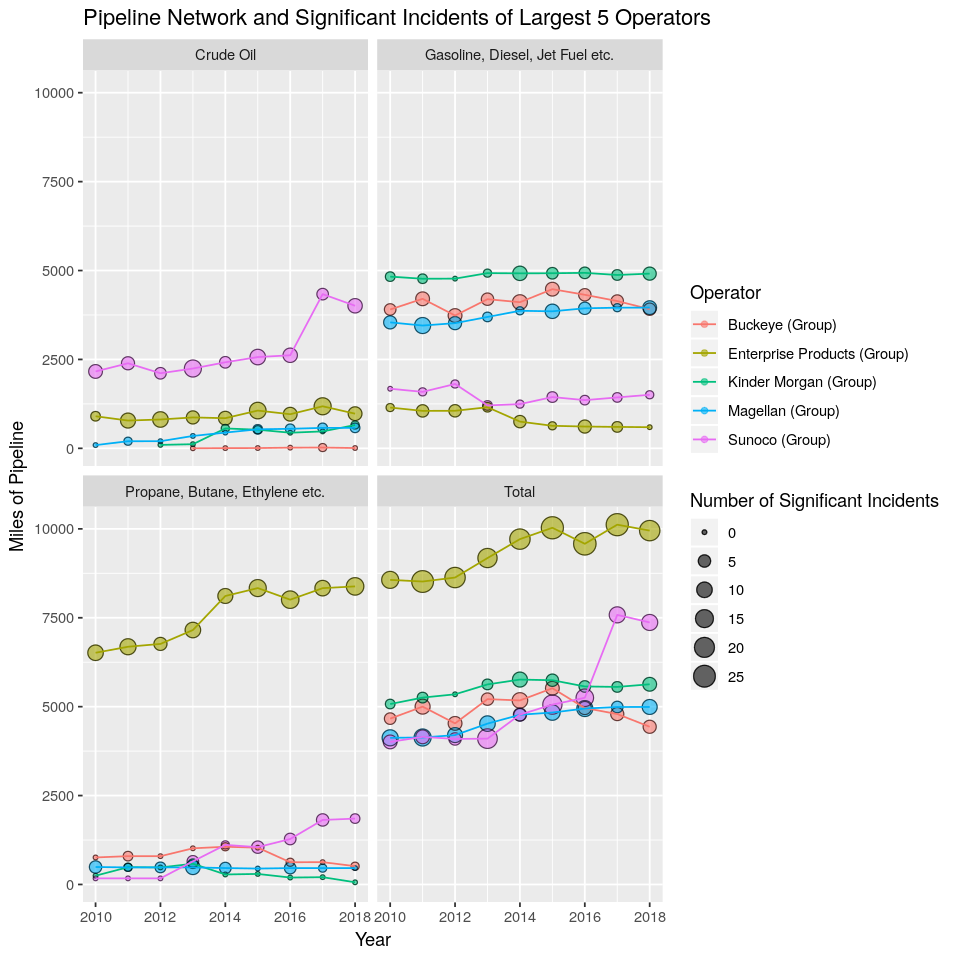

In [20]:
total <- sample %>%
    filter(OPERATOR_ID %in% top_5$OPERATOR_ID) %>%
    group_by(OPERATOR_ID, YEAR) %>%
    summarize(MILES = sum(MILES), SIGNIFICANT_INCIDENTS = sum(SIGNIFICANT_INCIDENTS)) %>%
    mutate(COMMODITY = 'Total')

plot <- sample %>%
    filter(OPERATOR_ID %in% top_5$OPERATOR_ID) %>%
    select(OPERATOR_ID, YEAR, COMMODITY, MILES, SIGNIFICANT_INCIDENTS) %>%
    mutate(COMMODITY = recode(COMMODITY, crude = "Crude Oil", 
                              hvl = "Propane, Butane, Ethylene etc.", 
                              `non-hvl` = "Gasoline, Diesel, Jet Fuel etc.")) %>%
    bind_rows(total) %>%
    ggplot(aes(x=YEAR, y=MILES, color=OPERATOR_ID, size=SIGNIFICANT_INCIDENTS)) +
        # facet_wrap(.~COMMODITY, scales="free_y") +
        facet_wrap(.~COMMODITY) +
        geom_point(alpha = 0.6) +
        geom_point(shape=21, color='black', alpha=0.6) +
        geom_line(size=0.5) +
        scale_x_continuous(breaks = seq(2010, 2018, 2), lim=c(2010, 2018)) +
        labs(title="Pipeline Network and Significant Incidents of Largest 5 Operators", 
             x="Year", y="Miles of Pipeline", color="Operator", size="Number of Significant Incidents")

print(plot)

In [14]:
sample %>%
    filter(OPERATOR_ID %in% top_5$OPERATOR_ID) %>%
    select(OPERATOR_ID, YEAR, COMMODITY, MILES, SIGNIFICANT_INCIDENTS) %>%
    mutate(COMMODITY = recode(COMMODITY, crude = "Crude Oil", 
                              hvl = "Propane, Butane, Ethylene etc.", 
                              `non-hvl` = "Gasoline, Diesel, Jet Fuel etc.")) %>%
    bind_rows(total) %>%
    filter(OPERATOR_ID == "Sunoco (Group)") %>%
    filter(COMMODITY == "Crude Oil")

Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

OPERATOR_ID,YEAR,COMMODITY,MILES,SIGNIFICANT_INCIDENTS
<fct>,<dbl>,<chr>,<dbl>,<dbl>
Sunoco (Group),2018,Crude Oil,4008.780,8
Sunoco (Group),2017,Crude Oil,4335.950,4
Sunoco (Group),2016,Crude Oil,2616.770,8
Sunoco (Group),2015,Crude Oil,2566.870,10
Sunoco (Group),2014,Crude Oil,2419.270,4
Sunoco (Group),2013,Crude Oil,2244.700,13
Sunoco (Group),2012,Crude Oil,2110.620,4
Sunoco (Group),2011,Crude Oil,2391.740,6
Sunoco (Group),2010,Crude Oil,2161.740,7


In [15]:
sample %>%
    filter(OPERATOR_ID %in% top_5$OPERATOR_ID) %>%
    select(OPERATOR_ID, YEAR, COMMODITY, MILES, SIGNIFICANT_INCIDENTS) %>%
    mutate(COMMODITY = recode(COMMODITY, crude = "Crude Oil", 
                              hvl = "Propane, Butane, Ethylene etc.", 
                              `non-hvl` = "Gasoline, Diesel, Jet Fuel etc.")) %>%
    filter(!complete.cases(.))

OPERATOR_ID,YEAR,COMMODITY,MILES,SIGNIFICANT_INCIDENTS
<fct>,<dbl>,<fct>,<dbl>,<dbl>


In [16]:
sample %>%
    {table(.$SIGNIFICANT_INCIDENTS)}


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14 
858 192  75  36  22  19  11  11   8   5   8   2   1   4   2 

In [17]:
sample %>%
    group_by(OPERATOR_ID) %>%
    filter(COMMODITY=='crude') %>%
    summarize(n = max(SIGNIFICANT_INCIDENTS)) %>%
    ungroup() %>%
    {table(.$n)}


 0  1  2  3  4 13 
 8 18  7  4  2  3 